<a href="https://colab.research.google.com/github/irivers29/medical-robot/blob/master/model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from google.colab import drive 
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline 
cv.__version__
#drive.mount("./ROPCA_Vision")
! ls

model_2.ipynb  package.json  readme.md	ROPCA_Vision  train_model.ipynb


In [36]:
!ls ./ROPCA_Vision/raw/right

img000080.png  img104072.png  img110044.png  img117041.png  img122073.png
img000081.png  img104073.png  img111040.png  img117042.png  img122074.png
img000082.png  img104074.png  img111041.png  img117043.png  img123040.png
img000083.png  img105040.png  img111042.png  img117044.png  img123041.png
img000084.png  img105041.png  img111043.png  img119070.png  img123042.png
img100080.png  img105042.png  img111044.png  img119071.png  img123043.png
img100081.png  img105043.png  img113040.png  img119072.png  img123044.png
img100082.png  img105044.png  img113041.png  img119073.png  img200080.png
img100083.png  img107070.png  img113042.png  img119074.png  img200081.png
img100084.png  img107071.png  img113043.png  img120040.png  img200082.png
img102040.png  img107072.png  img113044.png  img120041.png  img200083.png
img102041.png  img107073.png  img114070.png  img120042.png  img200084.png
img102042.png  img107074.png  img114071.png  img120043.png  img300080.png
img102043.png  img109040.png  img11407

In [37]:
backSub = cv.createBackgroundSubtractorMOG2()

Image is read


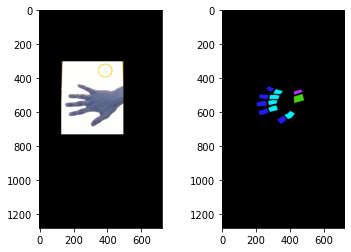

(1280, 720, 3)


In [38]:
#Open a simple image
raw_img= cv.imread("/media/jagatpreet/Data/summer_school/medical-robot/ROPCA_Vision/raw/right/img000080.png",-1)
labeled_img= cv.imread("/media/jagatpreet/Data/summer_school/medical-robot/ROPCA_Vision/labeled/right/img000080.png",-1)
img=cv.imread("/home/jagatpreet/Pictures/features_ours_vs_others.png",-1)
#prisnt(img)

if(raw_img is None):
    print("Image is empty")
else:
    print("Image is read")
#type(raw_img)
plt.subplot(121)
plt.imshow(raw_img)

plt.subplot(122)
plt.imshow(labeled_img)
plt.show()
print(raw_img.shape)
# cv.imshow("test",img)
# cv.waitkey(0)

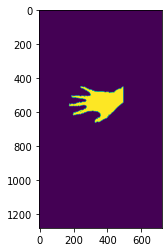

In [29]:
#converting from gbr to hsv color space
img_HSV = cv.cvtColor(raw_img, cv.COLOR_BGR2HSV)
#skin color range for hsv color space 
HSV_mask = cv.inRange(img_HSV, (0, 15, 0), (17,170,255)) 
HSV_mask = cv.morphologyEx(HSV_mask, cv.MORPH_OPEN, np.ones((3,3), np.uint8))
plt.imshow(HSV_mask)

#show results
# cv2.imshow("1_HSV.jpg",HSV_result)
# cv2.imshow("2_YCbCr.jpg",YCrCb_result)
# cv2.imshow("3_global_result.jpg",global_result)
# cv2.imshow("Image.jpg",img)

In [ ]:
#converting from gbr to YCbCr color space
img_YCrCb = cv.cvtColor(img, cv.COLOR_BGR2YCrCb)
#skin color range for hsv color space 
YCrCb_mask = cv.inRange(img_YCrCb, (0, 135, 85), (255,180,135)) 
YCrCb_mask = cv.morphologyEx(YCrCb_mask, cv.MORPH_OPEN, np.ones((3,3), np.uint8))

#merge skin detection (YCbCr and hsv)
global_mask=cv.bitwise_and(YCrCb_mask,HSV_mask)
global_mask=cv.medianBlur(global_mask,3)
global_mask = cv.morphologyEx(global_mask, cv.MORPH_OPEN, np.ones((4,4), np.uint8))


HSV_result = cv.bitwise_not(HSV_mask)
YCrCb_result = cv.bitwise_not(YCrCb_mask)
global_result=cv.bitwise_not(global_mask)


In [ ]:
cv.imwrite("1_HSV.jpg",HSV_result)
cv.imwrite("2_YCbCr.jpg",YCrCb_result)
cv.imwrite("3_global_result.jpg",global_result)
cv.waitKey(0)
cv.destroyAllWindows()  

In [ ]:
def get_all_filenames(folder): 
def segment_image(img):
def read_labels():